# C. Data Preprocessing

1. Clears the TensorFlow session and release any resources held by the backend

In [1]:
import tensorflow.keras.backend as K

K.clear_session()

2. Adjusts the logging level for TensorFlow to suppress warnings and control the verbosity of log messages generated by TensorFlow

In [2]:
import os

# Set the TensorFlow logging level to suppress warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  
# '0' (default) shows all logs, 
#'1' shows only errors, 
#'2' shows only errors and critical logs


3. Import libraries/modules

In [3]:
# pandas library for data manipulation and analysis
import pandas as pd

# numpy library for numerical computations and array operations
import numpy as np

#time module for various time-related functions eg: adding delays or timestamping 
import time

# seaborn library, which is a data visualization library built on top of matplotlib. 
# for creating attractive and informative statistical graphics
import seaborn as sns

# pyplot module from the matplotlib library 
# provides a MATLAB-like plotting interface for creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt

# prevents overfitting in neural network models
# used for regularization techniques l1_l2
from tensorflow.keras import regularizers

# Dropout: improves the model's generalization by reducing the reliance on specific neurons 
#          and helps prevent overfitting
# Reshape: modifies the dimensions of the input data before passing it to subsequent layers
# LSTM: for sequence modeling tasks and time-series data
# Dense: applies a linear transformation to the input data followed by an activation function
from tensorflow.keras.layers import Dropout, Reshape, LSTM, Dense 

# creates a linear stack of layers for building sequential neural network models
from tensorflow.keras.models import Sequential 

# converts class labels or target values into one-hot encoded format
from tensorflow.keras.utils import to_categorical

# monitors a specified metric and stops the training process early if the metric's improvement 
#    stagnates or deteriorates over a certain number of epochs
from tensorflow.keras.callbacks import EarlyStopping

# for compiling and training the neural network model
from tensorflow.keras.optimizers import legacy as legacy_adam

# splits the dataset into training and testing subsets for model development and evaluation
from sklearn.model_selection import train_test_split

# classification_report: generates a comprehensive report that includes various classification 
#                        metrics for each class in a classification problem
# confusion_matrix: creates a confusion matrix, which is a table that shows the count of true 
#                   positive, true negative, false positive, and false negative predictions 
#                   for each class in a classification problem
# accuracy_score: calculates the accuracy of a classification model by comparing the true labels 
#                 with the predicted labels
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

4. Variables used when building and training neural network models

In [4]:
#Define variables
num_sensors = 5 # number of flex sensors
num_classes = 10 # number of gestures

# Define training parameters
# number of times the entire dataset is passed through the neural network during training
epochs = 1000 

# number of training sets utilized in one iteration
batch_size = 128 

# rate at which the model learns from the data
learning_rate = 0.0001 

# initializes the optimizer used to update the model's weights during training
optimizer = legacy_adam.Adam(learning_rate=learning_rate)

5. RNN model architecture

In [5]:
# creates an instance of the Sequential class to stack layers in a linear manner
model = Sequential()

# first layer: LSTM layer with 1024 units, variable length with num_sensors features 
#              and returns the full sequence of outputs for each time step
model.add(LSTM(1024, return_sequences=True, input_shape=(None, num_sensors )))

# second layer: LSTM layer with 512 units maintaining the sequence output
model.add(LSTM(512, return_sequences=True))

# third layer: Dropout layer with a dropout rate of 0.5, helps prevent overfitting by 
#              randomly setting a fraction of input units to 0 during each update during training
model.add(Dropout(0.5))

# fourth layer: LSTM layer with 512 units maintaining the sequence output
model.add(LSTM(512, return_sequences=True))

# fifth layer: LSTM layer with 512 units, returns only the final output of the sequence
model.add(LSTM(512))

# sixth layer: Dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# seventh layer: Dense (fully connected) layer with 32 units, Leaky ReLU activation 
#                including L1 and L2 regularization with values of 0 and 0.001, respectively.
model.add(Dense(32, activation='LeakyReLU', kernel_regularizer=regularizers.l1_l2(l1=0, l2=0.001)))

# eighth layer: Dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# final layer: Dense layer with num_classes units and a softmax activation function
model.add(Dense(num_classes, activation='softmax'))

Metal device set to: Apple M2


6. Compile the model

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 1024)        4218880   
                                                                 
 lstm_1 (LSTM)               (None, None, 512)         3147776   
                                                                 
 dropout (Dropout)           (None, None, 512)         0         
                                                                 
 lstm_2 (LSTM)               (None, None, 512)         2099200   
                                                                 
 lstm_3 (LSTM)               (None, 512)               2099200   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense (Dense)               (None, 32)                1

7. Perform data preprocessing steps

a. Handling Missing Values: Check for missing values and handle them if necessary

In [8]:
# reads the CSV file and assigns the data to a DataFrame
df = pd.read_csv('/Users/sunilamaharjan/Desktop/London Metropolitan University/Summer Semester/mscProject/codes/Dataset/Number/sensor_data.csv')

# returns the count of missing values for each column in the DataFrame
df.isnull().sum()

Thumb              0
IndexFinger        0
MiddleFinger       0
RingFinger         0
LittleFinger       0
accelerometer_x    0
accelerometer_y    0
accelerometer_z    0
temperature        0
gyro_x             0
gyro_y             0
gyro_z             0
Gesture            0
dtype: int64

b. One-hot encoding

In [9]:
# Performs one-hot encoding on the 'Gesture' column
one_hot_encoded = pd.get_dummies(df['Gesture'], prefix='Gesture')

# Concatenates the encoded columns with the original DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# Removes the original 'Gesture' column if desired
df_encoded = df_encoded.drop('Gesture', axis=1)

# Prints the encoded DataFrame
print(df_encoded)

      Thumb  IndexFinger  MiddleFinger  RingFinger  LittleFinger  \
0       442          369           455         406           353   
1       485          461           491         438           407   
2       446          450           492         409           399   
3       385          445           489         413           413   
4       429          374           451         383           441   
...     ...          ...           ...         ...           ...   
7074    348          392           364         413           409   
7075    350          394           364         406           405   
7076    351          394           363         407           401   
7077    351          394           363         408           402   
7078    351          394           364         408           402   

      accelerometer_x  accelerometer_y  accelerometer_z  temperature  gyro_x  \
0               21728             1664             2208        28.01   31484   
1               15512  

c. Prepare Features X and labels y

In [10]:
# drops columns that contain the word 'Gesture' in their name which was been created after one-hot encoded
X = df_encoded.drop(columns=df_encoded.filter(like='Gesture').columns, axis=1)

# dropping all other unnecessary columns
X = X.drop('temperature', axis=1)
X = X.drop('accelerometer_x', axis=1)
X = X.drop('accelerometer_y', axis=1)
X = X.drop('accelerometer_z', axis=1)
X = X.drop('gyro_x', axis=1)
X = X.drop('gyro_y', axis=1)
X = X.drop('gyro_z', axis=1)

# extracts the column with the highest value (1) from the one-hot encoded gesture columns using the 
# idxmax(axis=1) function
y = df_encoded[df_encoded.filter(like='Gesture').columns].idxmax(axis=1)

# processes the extracted gesture labels by splitting the string on underscores ('_') and converting 
# the second part to an integer.
y = y.str.split('_').str[1].astype(int)

X

,Thumb,IndexFinger,MiddleFinger,RingFinger,LittleFinger
0,442,369,455,406,353
1,485,461,491,438,407
2,446,450,492,409,399
3,385,445,489,413,413
4,429,374,451,383,441
...,...,...,...,...,...
7074,348,392,364,413,409
7075,350,394,364,406,405
7076,351,394,363,407,401
7077,351,394,363,408,402


In [11]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7074    9
7075    9
7076    9
7077    9
7078    9
Length: 7079, dtype: int64

8. Splitting the Dataset into training, validation, and test sets 

In [12]:
# Splits feature matrix X and label vector y into training and testing sets with proportion of data 
# to be used for testing, 20%, ensuring the data split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# further splits the training data (X_train and y_train) into training and validation sets with 
# proportion of 20% ensuring the data split is reproducible
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,X_val.shape,y_val.shape)

(4530, 5) (1416, 5) (4530,) (1416,) (1133, 5) (1133,)


In [13]:
# The model expects a 3-dimensional input tensor, but the provided input data has a shape of (32, 11), 
# which is 2-dimensional.

# Convert DataFrame to numpy array
X_train_array = X_train.values
X_val_array = X_val.values

# Reshape the training data [(num_samples, 1, num_features)]
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])

# Reshape the validation data
X_val_reshaped = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])

# Reshape the testing data
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

X_train_reshaped

array([[[340, 498, 474, 274, 317]],

       [[363, 470, 375, 289, 316]],

       [[336, 278, 363, 272, 297]],

       ...,

       [[426, 500, 490, 261, 287]],

       [[338, 472, 348, 247, 278]],

       [[454, 460, 493, 269, 297]]])

In [14]:
print(X_train_reshaped.shape, X_val_reshaped.shape)

(4530, 1, 5) (1133, 1, 5)


In [15]:
print(y_train.shape, y_val.shape, y_test.shape)

(4530,) (1133,) (1416,)


In [16]:
# The model's output shape is (batch_size, num_classes), which in this case is (32, 10), 
# but the shape of the target values is (32, 1).

# Convert the target values to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_val_encoded = to_categorical(y_val, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# Remove the extra dimension from the target data
y_train_encoded = np.squeeze(y_train_encoded)
y_val_encoded = np.squeeze(y_val_encoded)
y_test_encoded = np.squeeze(y_test_encoded)


# D. Model Training

In [17]:
# records the starting time of the training process
start_time = time.time()

# monitors the validation accuracy during training ensuring the model's weights are restored to the 
# best epoch's weights when training stops after no improvement for a certain number of consecutive epochs
early_stopping = EarlyStopping(monitor='accuracy', verbose=1, patience=20, mode='max', restore_best_weights=True)

# Train the model
history = model.fit(X_train_reshaped, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(X_val_reshaped, y_val_encoded), callbacks=[early_stopping])

# Calculate the execution time
end_time = time.time()
execution_time = end_time - start_time

# Convert total seconds to hours, minutes, and seconds
hours = int(execution_time // 3600)
minutes = int((execution_time % 3600) // 60)
seconds = int(execution_time % 60)

# Display the execution time in hours, minutes, and seconds format
print("Overall execution time: {} hours, {} minutes, and {} seconds".format(hours, minutes, seconds))



Epoch 1/1000
36/36 [==============================] - 4s 58ms/step - loss: 2.3513 - accuracy: 0.1929 - val_loss: 2.3294 - val_accuracy: 0.3186
Epoch 2/1000
36/36 [==============================] - 1s 36ms/step - loss: 2.2423 - accuracy: 0.2561 - val_loss: 2.0867 - val_accuracy: 0.3177
Epoch 3/1000
36/36 [==============================] - 1s 35ms/step - loss: 1.9524 - accuracy: 0.3347 - val_loss: 1.7157 - val_accuracy: 0.5004
Epoch 4/1000
36/36 [==============================] - 1s 34ms/step - loss: 1.6993 - accuracy: 0.4307 - val_loss: 1.5184 - val_accuracy: 0.5128
Epoch 5/1000
36/36 [==============================] - 1s 36ms/step - loss: 1.5576 - accuracy: 0.4808 - val_loss: 1.3877 - val_accuracy: 0.5163
Epoch 6/1000
36/36 [==============================] - 1s 36ms/step - loss: 1.4676 - accuracy: 0.5102 - val_loss: 1.3074 - val_accuracy: 0.5534
Epoch 7/1000
36/36 [==============================] - 1s 34ms/step - loss: 1.4053 - accuracy: 0.5201 - val_loss: 1.2378 - val_accuracy: 0.5940

Epoch 58/1000
36/36 [==============================] - 1s 35ms/step - loss: 0.7614 - accuracy: 0.7068 - val_loss: 0.6882 - val_accuracy: 0.7387
Epoch 59/1000
36/36 [==============================] - 1s 35ms/step - loss: 0.7390 - accuracy: 0.7201 - val_loss: 0.7061 - val_accuracy: 0.7070
Epoch 60/1000
36/36 [==============================] - 1s 34ms/step - loss: 0.7534 - accuracy: 0.7115 - val_loss: 0.6771 - val_accuracy: 0.7476
Epoch 61/1000
36/36 [==============================] - 1s 34ms/step - loss: 0.7511 - accuracy: 0.7155 - val_loss: 0.6843 - val_accuracy: 0.7184
Epoch 62/1000
36/36 [==============================] - 1s 34ms/step - loss: 0.7454 - accuracy: 0.7163 - val_loss: 0.6925 - val_accuracy: 0.7308
Epoch 63/1000
36/36 [==============================] - 1s 34ms/step - loss: 0.7300 - accuracy: 0.7199 - val_loss: 0.6724 - val_accuracy: 0.7282
Epoch 64/1000
36/36 [==============================] - 1s 34ms/step - loss: 0.7283 - accuracy: 0.7227 - val_loss: 0.6996 - val_accuracy:

Epoch 115/1000
36/36 [==============================] - 1s 33ms/step - loss: 0.6358 - accuracy: 0.7472 - val_loss: 0.6217 - val_accuracy: 0.7529
Epoch 116/1000
36/36 [==============================] - 1s 35ms/step - loss: 0.6214 - accuracy: 0.7611 - val_loss: 0.6140 - val_accuracy: 0.7670
Epoch 117/1000
36/36 [==============================] - 1s 34ms/step - loss: 0.6447 - accuracy: 0.7461 - val_loss: 0.5889 - val_accuracy: 0.7793
Epoch 118/1000
36/36 [==============================] - 1s 34ms/step - loss: 0.6324 - accuracy: 0.7552 - val_loss: 0.5849 - val_accuracy: 0.7705
Epoch 119/1000
36/36 [==============================] - 1s 34ms/step - loss: 0.6152 - accuracy: 0.7629 - val_loss: 0.6105 - val_accuracy: 0.7599
Epoch 120/1000
36/36 [==============================] - 1s 36ms/step - loss: 0.6090 - accuracy: 0.7667 - val_loss: 0.5822 - val_accuracy: 0.7802
Epoch 121/1000
36/36 [==============================] - 1s 34ms/step - loss: 0.6059 - accuracy: 0.7638 - val_loss: 0.5846 - val_ac

36/36 [==============================] - 1s 34ms/step - loss: 0.4937 - accuracy: 0.8060 - val_loss: 0.4936 - val_accuracy: 0.8208
Epoch 228/1000
36/36 [==============================] - 1s 33ms/step - loss: 0.4950 - accuracy: 0.8077 - val_loss: 0.4812 - val_accuracy: 0.8261
Epoch 229/1000
36/36 [==============================] - 1s 34ms/step - loss: 0.4915 - accuracy: 0.8057 - val_loss: 0.5059 - val_accuracy: 0.8138
Epoch 230/1000
36/36 [==============================] - 1s 34ms/step - loss: 0.4932 - accuracy: 0.8082 - val_loss: 0.5187 - val_accuracy: 0.8014
Epoch 231/1000
36/36 [==============================] - 1s 33ms/step - loss: 0.5063 - accuracy: 0.8000 - val_loss: 0.4953 - val_accuracy: 0.8208
Epoch 232/1000
36/36 [==============================] - 1s 35ms/step - loss: 0.4985 - accuracy: 0.8064 - val_loss: 0.5110 - val_accuracy: 0.8138
Epoch 233/1000
36/36 [==============================] - 1s 35ms/step - loss: 0.4964 - accuracy: 0.8104 - val_loss: 0.4814 - val_accuracy: 0.8323


In [18]:
# Save the trained model to a file
# ".h5" extension is commonly used for saving Keras models in Hierarchical Data Format (HDF5) format. 
# It's a binary file format that allows to store a wide range of data and metadata, including deep learning models
saved_model_path = '/Users/sunilamaharjan/Desktop/London Metropolitan University/Summer Semester/mscProject/codes/Dataset/Number/sensor_data_training_model_withoutFs_3axis.h5'  
model.save(saved_model_path)


/Users/sunilamaharjan/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# E. Model Evaluation

In [19]:
# Evaluate the model on the testing set (calculates the loss and metrics including accuracy)
loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


45/45 [==============================] - 1s 20ms/step - loss: 0.5171 - accuracy: 0.7945
Test Loss: 0.5171424746513367
Test Accuracy: 0.7944915294647217


In [20]:
# Get the predictions for the testing set
y_pred = model.predict(X_test_reshaped)

# Convert the predictions to class labels by selecting the class with the highest probability for each sample
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate a classification report by comparing the true class labels (y_test) with the 
# predicted class labels (y_pred_labels).
report = classification_report(y_test, y_pred_labels)

# Print the classification report
print(report)


45/45 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       159
           1       0.70      0.77      0.73       129
           2       0.79      0.69      0.73       147
           3       0.87      0.33      0.48       139
           4       0.59      0.80      0.68       140
           5       0.72      0.83      0.77       143
           6       0.81      0.81      0.81       142
           7       0.85      0.89      0.87       129
           8       0.88      0.92      0.90       132
           9       0.99      0.92      0.96       156

    accuracy                           0.79      1416
   macro avg       0.81      0.79      0.78      1416
weighted avg       0.81      0.79      0.79      1416



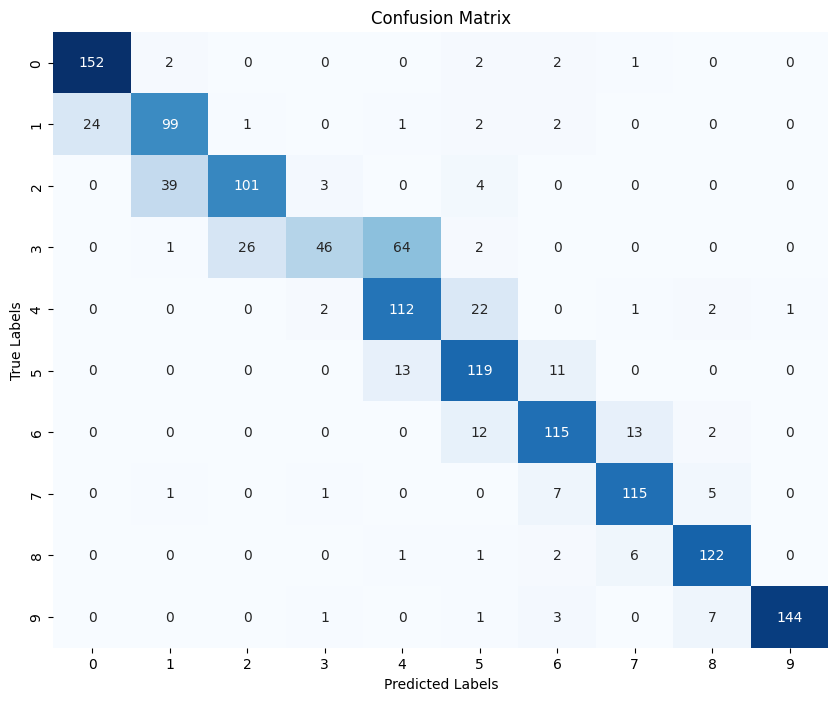

In [21]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# calculates the accuracy of model's predictions by comparing the true labels (y_test) 
# with the predicted labels (y_pred_labels).
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)


Accuracy: 0.7944915254237288
